# PASSNETWORK

/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_89027/170285529.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Completions['passer'] = pas
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_89027/170285529.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Completions['recipient'] = rec
/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_89027/170285529.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.


<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.
findfont: Font family 'Century Gothic' not found.


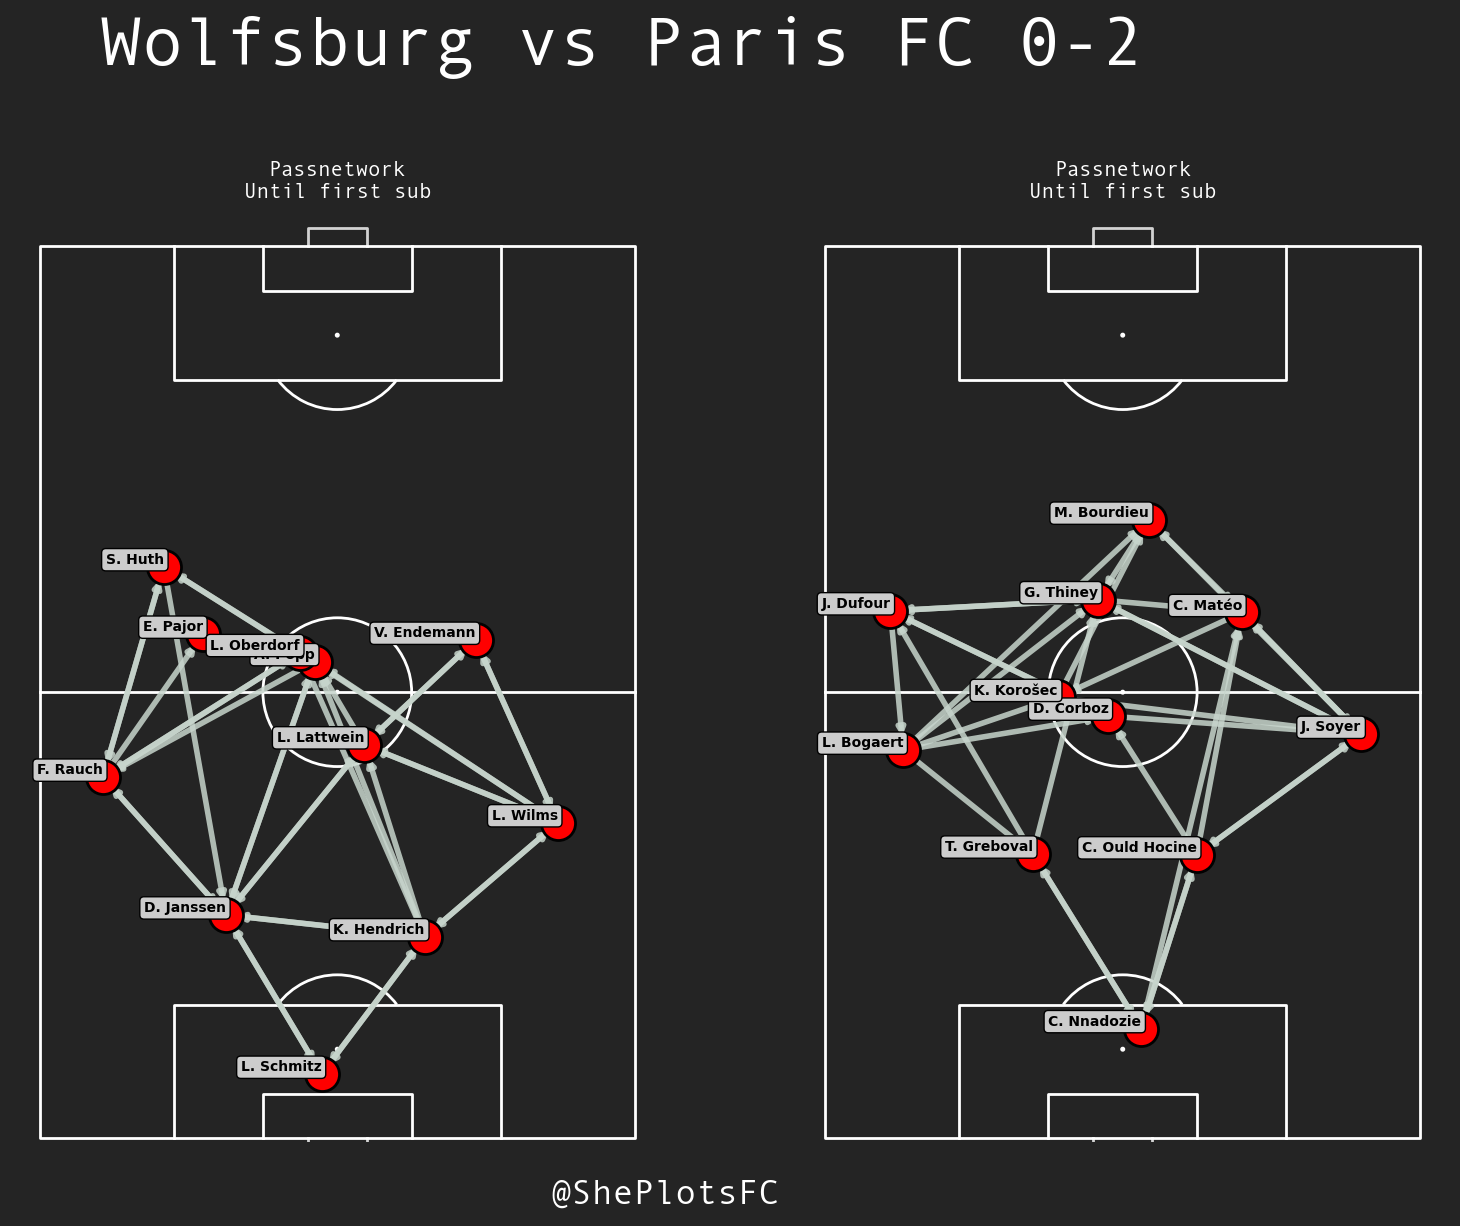

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import VerticalPitch
from matplotlib import patches
import matplotlib.patheffects as path_effects
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch, VerticalPitch, FontManager
import math
from matplotlib.colors import to_rgba
from scipy.spatial import ConvexHull



# load the data
df = pd.read_csv("/Users/marclambertes/Downloads/WOBPAR.csv")

fig, axs = plt.subplots(1, 2, figsize=(18, 12))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


fig.set_facecolor('#242424')

        
ax = axs[0]
OneTeam = df.loc[(df['contestantId']=='6bl19flj1eggw2gw7sya19bof')].reset_index()

OneTeam["newsecond"] = 60*OneTeam["timeMin"]+OneTeam["timeSec"]
    
OneTeam.sort_values(by=['newsecond'])

#identify the passer and then the recipient, who'll be the playerId of the next action
OneTeam['passer'] = OneTeam['playerName']

OneTeam['recipient'] = OneTeam['passer'].shift(-1)


#filter for only passes and then successful passes
Passes = OneTeam.loc[(OneTeam['typeId']==1)]

Completions = Passes.loc[(Passes['outcome']==1)]

#find time of the team's first substitution and filter the df to only passes before that
Subs = OneTeam.loc[(OneTeam['typeId']==18)]
SubTimes = Subs["newsecond"]
SubOne = SubTimes.min()

pas = Completions['passer']
rec = Completions['recipient']

Completions['passer'] = pas
Completions['recipient'] = rec

SubTimes
#SubOne

Completions = Completions.loc[Completions['newsecond'] < SubOne]

average_locs_and_count = Completions.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
average_locs_and_count.columns = ['x', 'y', 'count']

average_locs_and_count

passes_between = Completions.groupby(['passer', 'recipient']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

passes_between = passes_between.merge(average_locs_and_count, left_on='passer', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='recipient', right_index=True,
                                      suffixes=['', '_end'])


passes_between.dtypes

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

#set minimum threshold for pass arrows to be plotted. So this will only plot combos which occured at least 5 times.
passes_between = passes_between.loc[(passes_between['pass_count']>2)]


#Make arrows less transparent if they have a higher count, totally optional of course
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - min_transparency)) + min_transparency
color[:, 3] = c_transparency


pitch = VerticalPitch(pitch_type='statsbomb', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='white',
                      half=False,
                      goal_type='box',
                      goal_alpha=0.8)
pitch.draw(ax=ax)
#fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False,)
fig.set_facecolor("#71797E")



def pass_line_template(ax, x, y, end_x, end_y, line_color):
    ax.annotate('', xy=(80-.8*end_y, 1.2*end_x), xytext=(80-.8*y, 1.2*x), zorder=1,
    arrowprops=dict(arrowstyle='-|>', linewidth=4, color='#c7d5cc', alpha=.85))
    
def pass_line_template_shrink(ax, x, y, end_x, end_y, line_color, dist_delta=1.2):
    dist = math.hypot(end_x - x, end_y - y)
    angle = math.atan2(end_y-y, end_x-x)
    upd_x = x + (dist - dist_delta) * math.cos(angle)
    upd_y = y + (dist - dist_delta) * math.sin(angle)
    pass_line_template(ax, x, y, upd_x, upd_y, line_color=line_color)
    
    
for index, row in passes_between.iterrows():
    pass_line_template_shrink(ax,row['x'],row['y'],row['x_end'],row['y_end'],'white')

#plot nodes
pass_box = pitch.scatter(1.2*average_locs_and_count.x, 80-0.8*average_locs_and_count.y, s=600,
                           color='#FF0000', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 2 Times", (-4, 40), color='white',
         fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono",)


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in average_locs_and_count.iterrows():
   pitch.annotate(row.name, xy=(1.2*row.x, 80-0.8*row.y), bbox = dict(boxstyle="round", fc="0.8"), c='black', va='bottom', ha='right', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)

#Set the background color
fig.patch.set_facecolor('#242424')

#annotatios
ax.set_title("Passnetwork\nUntil first sub", fontsize=15, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)

ax = axs[1]
OneTeam = df.loc[(df['contestantId']=='bdfjkux9o0vtsdig5zsbhtysq')].reset_index()

OneTeam["newsecond"] = 60*OneTeam["timeMin"]+OneTeam["timeSec"]
    
OneTeam.sort_values(by=['newsecond'])

#identify the passer and then the recipient, who'll be the playerId of the next action
OneTeam['passer'] = OneTeam['playerName']

OneTeam['recipient'] = OneTeam['passer'].shift(-1)


#filter for only passes and then successful passes
Passes = OneTeam.loc[(OneTeam['typeId']==1)]

Completions = Passes.loc[(Passes['outcome']==1)]

#find time of the team's first substitution and filter the df to only passes before that
Subs = OneTeam.loc[(OneTeam['typeId']==18)]
SubTimes = Subs["newsecond"]
SubOne = SubTimes.min()

pas = Completions['passer']
rec = Completions['recipient']

Completions['passer'] = pas
Completions['recipient'] = rec

SubTimes
#SubOne

Completions = Completions.loc[Completions['newsecond'] < SubOne]

average_locs_and_count = Completions.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
average_locs_and_count.columns = ['x', 'y', 'count']

average_locs_and_count

passes_between = Completions.groupby(['passer', 'recipient']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

passes_between = passes_between.merge(average_locs_and_count, left_on='passer', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='recipient', right_index=True,
                                      suffixes=['', '_end'])


passes_between.dtypes

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

#set minimum threshold for pass arrows to be plotted. So this will only plot combos which occured at least 5 times.
passes_between = passes_between.loc[(passes_between['pass_count']>2)]


#Make arrows less transparent if they have a higher count, totally optional of course
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - min_transparency)) + min_transparency
color[:, 3] = c_transparency


pitch = VerticalPitch(pitch_type='statsbomb', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='white',
                      half=False,
                      goal_type='box',
                      goal_alpha=0.8)
pitch.draw(ax=ax)
#fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False,)
fig.set_facecolor("#71797E")



def pass_line_template(ax, x, y, end_x, end_y, line_color):
    ax.annotate('', xy=(80-.8*end_y, 1.2*end_x), xytext=(80-.8*y, 1.2*x), zorder=1,
    arrowprops=dict(arrowstyle='-|>', linewidth=4, color='#c7d5cc', alpha=.85))
    
def pass_line_template_shrink(ax, x, y, end_x, end_y, line_color, dist_delta=1.2):
    dist = math.hypot(end_x - x, end_y - y)
    angle = math.atan2(end_y-y, end_x-x)
    upd_x = x + (dist - dist_delta) * math.cos(angle)
    upd_y = y + (dist - dist_delta) * math.sin(angle)
    pass_line_template(ax, x, y, upd_x, upd_y, line_color=line_color)
    
    
for index, row in passes_between.iterrows():
    pass_line_template_shrink(ax,row['x'],row['y'],row['x_end'],row['y_end'],'white')

#plot nodes
pass_box = pitch.scatter(1.2*average_locs_and_count.x, 80-0.8*average_locs_and_count.y, s=600,
                           color='#FF0000', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 2 Times", (-4, 40), color='white',
         fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono",)


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in average_locs_and_count.iterrows():
   pitch.annotate(row.name, xy=(1.2*row.x, 80-0.8*row.y), bbox = dict(boxstyle="round", fc="0.8"), c='black', va='bottom', ha='right', size=10, fontweight='bold', fontfamily="Century Gothic",ax=ax)

#Set the background color
fig.patch.set_facecolor('#242424')

#annotatios
ax.set_title("Passnetwork\nUntil first sub", fontsize=15, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)
fig_text(s="Wolfsburg vs Paris FC 0-2", x=0.15, y=1.05, fontsize=50, color="white", fontfamily='Andale Mono', ax=ax)

fig_text(s="@ShePlotsFC", x=0.4, y=0.08, fontsize=25, color='white', fontfamily='Andale Mono', ax=ax)


plt.savefig('evebri - passnetwork.png', dpi=500, bbox_inches = 'tight', facecolor='#242424')


plt.show



  

# PASS MAP

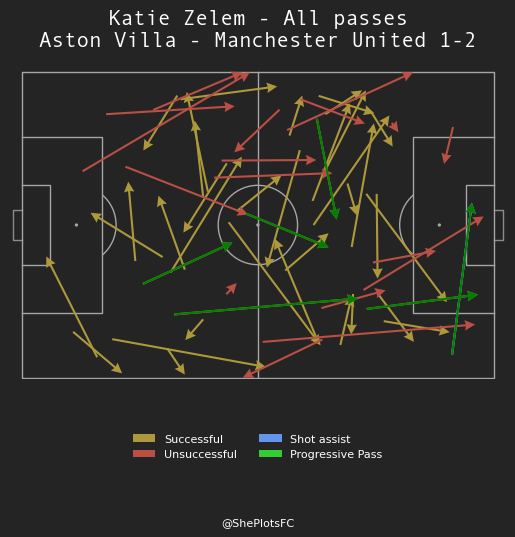

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

from matplotlib import patches
import matplotlib.patheffects as path_effects
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch, FontManager
import math
from matplotlib.colors import to_rgba
from scipy.spatial import ConvexHull
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


df1 = pd.read_excel("Aston Villa - Manchester United - Progressive passes.xlsx")
#df1 = df1.loc[(df1['contestantId']=='5rurqie3qt1qav9ir5mkqinn')].reset_index()
df1 = df1.loc[(df1['playerName']=='K. Zelem')].reset_index()


#df1 = df1.loc[df1['progressive']==True].reset_index()

# Change the pitch line color to grey and line width to 1
pitch = Pitch(pitch_type='opta', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='#a6a6a6',
                      linewidth=1, half=False, goal_type='box', goal_alpha=0.8)

fig, ax = pitch.draw()
figsize=(18, 12)
# add Dortmund logo


#df1 = df1.loc[df1['x'] > 50]
#df1 = df1.loc[df1['endX'] > 50]


for i, x in enumerate(df1['x']):
    if 'outcome' in df1.columns and df1['outcome'].iloc[i] == 1 and df1['Corner'].iloc[i] != 1:#and df1['Cutback'].iloc[i] == 1:
        end_x = pd.Series(df1['endX'].iloc[i]).astype(float)
        end_y = pd.Series(df1['endY'].iloc[i]).astype(float)
        pitch.arrows(df1['x'].iloc[i], df1['y'].iloc[i], end_x, end_y, 
                     width=1.5, zorder=2, headwidth=5, headlength=5, color='#ad993c', ax=ax)

      
        
for i, x in enumerate(df1['x']):
    if 'outcome' in df1.columns and df1['outcome'].iloc[i] == 0 and df1['Corner'].iloc[i] != 1:#and df1['Cutback'].iloc[i] == 1:
        end_x = pd.Series(df1['endX'].iloc[i]).astype(float)
        end_y = pd.Series(df1['endY'].iloc[i]).astype(float)
        pitch.arrows(df1['x'].iloc[i], df1['y'].iloc[i], end_x, end_y, 
                     width=1.5, zorder=2, headwidth=5, headlength=5, color='#ba4f45', ax=ax)
        
for i, x in enumerate(df1['x']):
    if 'outcome' in df1.columns and df1['outcome'].iloc[i] == 1 and df1['Assist'].iloc[i] == 1 and df1['Corner'].iloc[i] != 1:
        end_x = pd.Series(df1['endX'].iloc[i]).astype(float)
        end_y = pd.Series(df1['endY'].iloc[i]).astype(float)
        pitch.arrows(df1['x'].iloc[i], df1['y'].iloc[i], end_x, end_y, 
                     width=1.5, zorder=2, headwidth=5, headlength=5, color='cornflowerblue', ax=ax)
        
for i, x in enumerate(df1['x']):
    if 'outcome' in df1.columns and df1['outcome'].iloc[i] == 1 and df1['progressive'].iloc[i] == True and df1['Corner'].iloc[i] != 1:
        end_x = pd.Series(df1['endX'].iloc[i]).astype(float)
        end_y = pd.Series(df1['endY'].iloc[i]).astype(float)
        pitch.arrows(df1['x'].iloc[i], df1['y'].iloc[i], end_x, end_y, 
                     width=1.5, zorder=2, headwidth=5, headlength=5, color='green', ax=ax)



total_passes = len(df1)
successful_passes = df1[df1['outcome'] == 1]['outcome'].count()
successful_percentage = (successful_passes / total_passes) * 100

# Create a new figure and axis for the text
#fig.text(0.82, 0.77, f"Total Passes: {total_passes}", fontsize=5, color="w", ha='left', va='center')
#fig.text(0.22, 0.74, f"Successful Percentage: {successful_percentage:.2f}%", fontsize=5, color="w", ha='left', va='center')

   

# Change the background color to grey-black
fig.set_facecolor('#242424')


ax.set_title("Katie Zelem - All passes\nAston Villa - Manchester United 1-2", fontsize=15, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)

# Define colors for legend labels
#colors = {'Successful': '#ad993c', 'Unsuccessful': '#ba4f45'}

# Plot the legend outside the pitch
colors = {'Successful': '#ad993c', 'Unsuccessful': '#ba4f45', 'Shot assist': 'cornflowerblue', 'Progresssive Pass': "limegreen"}
labels = {'Successful': 'Successful', 'Unsuccessful': 'Unsuccessful', 'Shot assist': 'Shot assist', 'Progressive Pass': 'Progressive Pass'}

# Plot the legend outside the pitch
ax.legend(handles=[patches.Patch(facecolor=color) for color in colors.values()],
          labels=labels.values(), labelcolor='w', loc='lower center', bbox_to_anchor=(0.5, -0.28),
          ncol=2, frameon=False, fontsize=8)

# Add text to the plot
#fig.text(0.5, 0.93, "NS Passes", fontsize=15, color="w", fontfamily="Andale Mono",
 #        fontweight='bold', ha='center', va='center')
fig.text(0.5, -0.1, "@ShePlotsFC", fontsize=8, color="w", ha='center', va='center')
plt.savefig('K. Zelem passes.png', dpi=750, bbox_inches='tight', facecolor='#242424')



## DEFENSIVE ACTIONS

/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_12152/2356591321.py:8: DtypeWarning: Columns (75,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/marclambertes/Python/Czechia.csv")


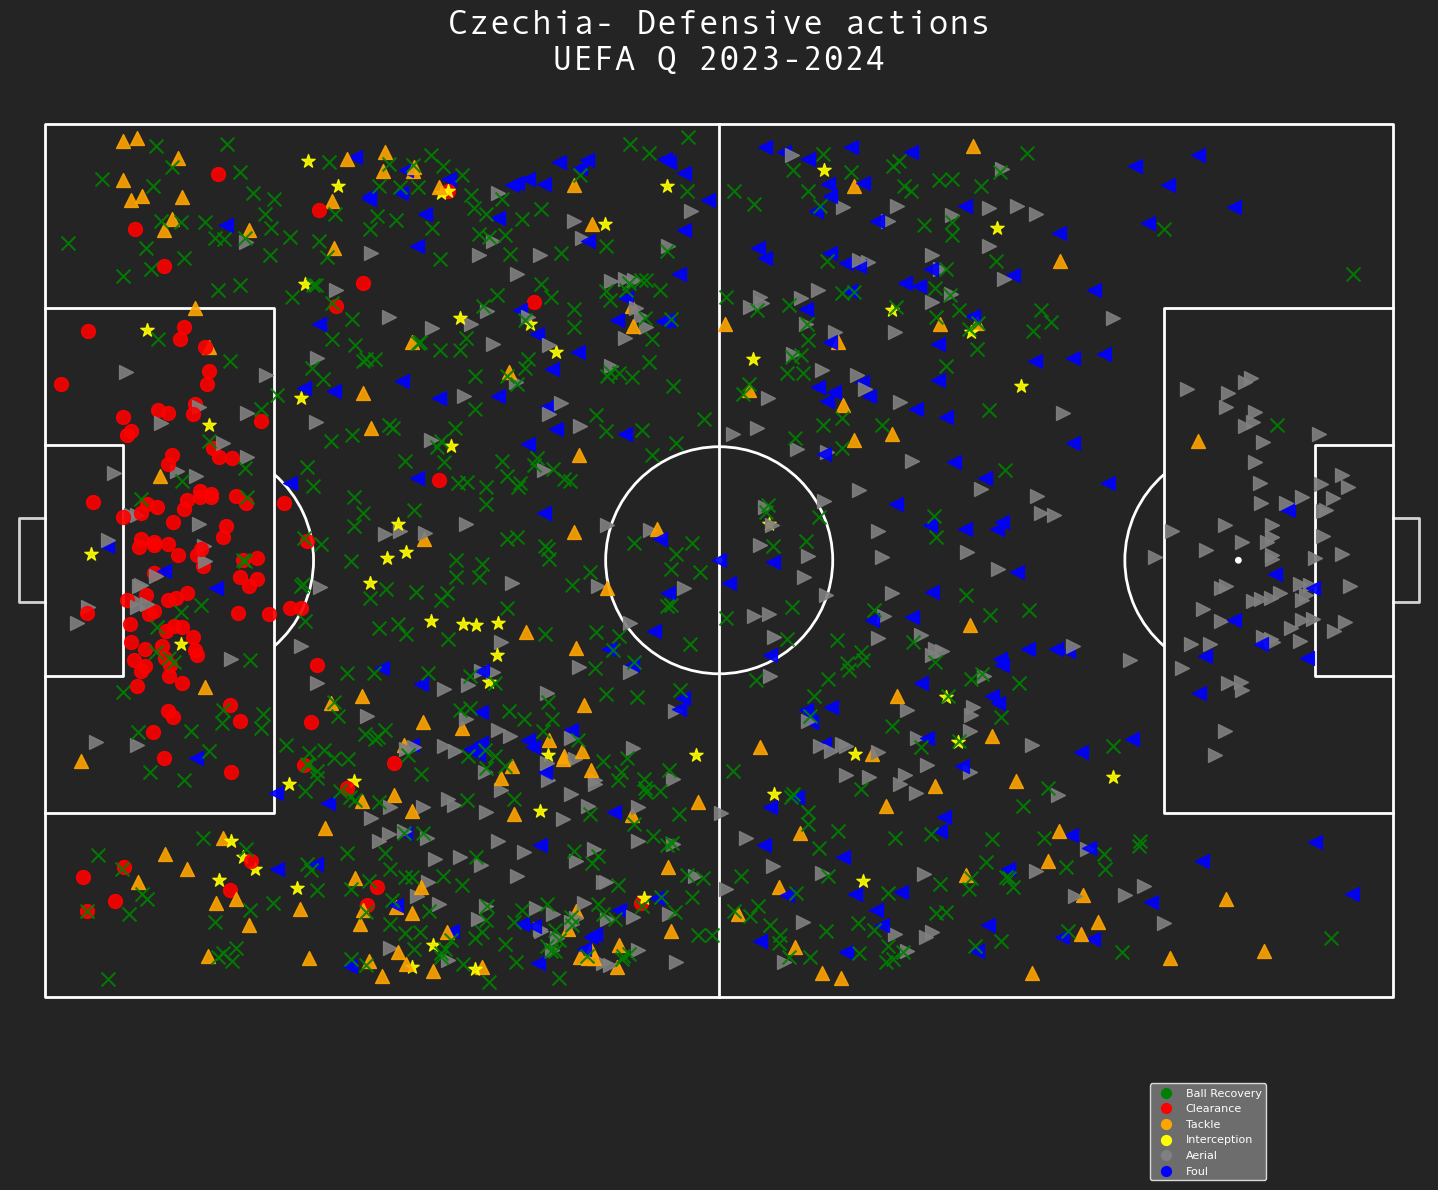

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib import patches

text_color = 'w'
df = pd.read_csv("/Users/marclambertes/Python/Czechia.csv")
df = df.loc[(df['contestantId']=='70tnqyqn871jwlk26gtjw7knm')].reset_index()
#df = df.loc[(df['playerName']=='A. Didic')].reset_index()


pitch = Pitch(pitch_type='opta', pitch_width=68, pitch_length=105, pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='white',  # pitch extends slightly below halfway line
              half=False,  # half of a pitch
              goal_type='box',
              goal_alpha=0.8) # rotate the pitch

fig, ax = pitch.draw(figsize=(18,12))
fig.set_facecolor('#242424')

#team2 will feature right        
for x in range(len(df['x'])):
    if df['typeId'][x] == 49:
        plt.scatter(df['x'][x], df['y'][x], color='green', marker='x', s=100, alpha=.9, zorder=3)
    if df['typeId'][x] == 12:
        plt.scatter(df['x'][x], df['y'][x], color='red', marker='o', s=100, alpha=.9, zorder=2)
    if df['typeId'][x] == 7:
        plt.scatter(df['x'][x], df['y'][x], color='orange', marker='^',s=100, alpha=.9, zorder=2)
    if df['typeId'][x] == 8:
        plt.scatter(df['x'][x], df['y'][x], color='yellow', marker='*',s=100, alpha=.9, zorder=2)  
    if df['typeId'][x] == 44:
        plt.scatter(df['x'][x], df['y'][x], color='grey', marker='>', s=100, alpha=.9, zorder=2) 
    if df['typeId'][x] == 4:
        plt.scatter(df['x'][x], df['y'][x], color='blue', marker='<', s=100, alpha=.9, zorder=2) 





colors = {'Ball Recovery': 'green', 'Clearance': 'red', 'Tackle': 'orange', 'Interception': 'yellow', 'Aerial': 'grey', 'Foul': 'blue'}
labels = {'Ball Recovery': 'Ball Recovery', 'Clearance': 'Clearance', 'Tackle': 'Tackle', 'Interception': 'Interception', 'Aerial': 'Aerial', 'Foul': 'Foul'}



# create a list of handles for each event type
handles = [plt.scatter([],[], marker='o', color=colors[label], s=50, alpha=1, zorder=3) for label in labels.values()]

# add the legend to the plot
legend = plt.legend(handles, labels.values(), loc='lower left', bbox_to_anchor=(0.8, -0.2), prop={'size': 8}, framealpha=0.8, labelcolor='w')

# set the facecolor and edgecolor of the legend
frame = legend.get_frame()
frame.set_facecolor('grey')
frame.set_edgecolor('white')

ax.set_title("Czechia- Defensive actions\nUEFA Q 2023-2024", fontsize=25, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)

#fig.text(.40,0.01,f'@ShePlotsFC / twitter',fontstyle='italic',fontsize=15,fontfamily='Andale Mono', color='w')
plt.savefig('wolfsbu - defensive.png', dpi=750, bbox_inches = 'tight', facecolor='#242424')




# EXPECTED THREAT - xT

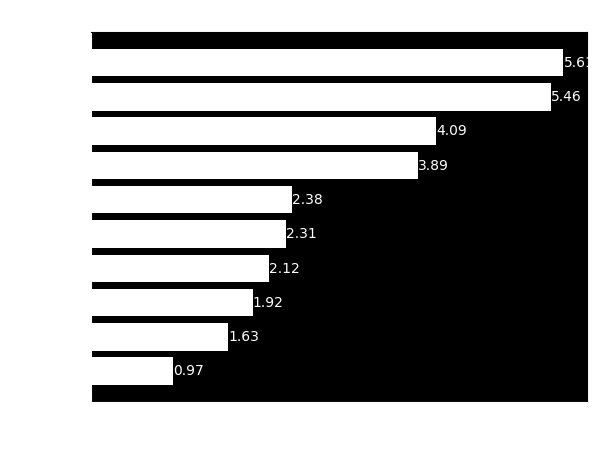

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("/Users/marclambertes/Python/Czechia xT.xlsx")
df = df.loc[(df['contestantId']=='70tnqyqn871jwlk26gtjw7knm')].reset_index()
df_grouped = df.groupby('playerName')['xT'].sum().reset_index()
df_top10 = df_grouped.sort_values('xT', ascending=False).head(10)

fig, ax = plt.subplots()
plt.barh(df_top10['playerName'], df_top10['xT'], align='center', color='white')
plt.xlabel('xT')
plt.title("Top xT performers - Czechia", color="w")
ax.patch.set_facecolor('#000000')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.invert_yaxis() # Add this line to invert the y-axis


for i, v in enumerate(df_top10['xT']):
    ax.text(v + 0.0001, i, f"{v:.2f}", color='white', va='center', ha='left')
    
plt.savefig('xT.png', dpi=750, bbox_inches = 'tight', facecolor='#000000')


plt.show()


# EXPECTED GOALS FLOW

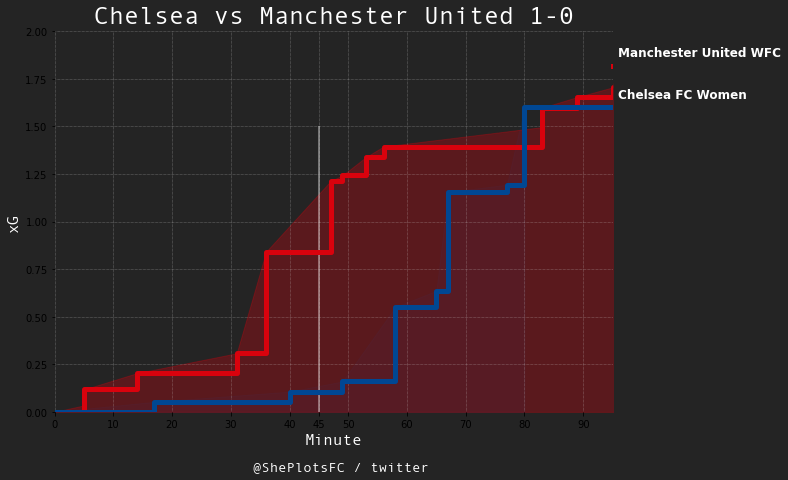

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('Downloads/FA/xgCSV/2023-05-14_Chelsea FC Women - Manchester United WFC.csv')
#df = df.loc[(df['match_id']==3900587)]

#now that we have our dataframe set up, we are going to create some lists to plot the different xG values
#4 lists - home and away xg and minutes
#We start these with zero so our charts will start at 0
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]


hteam = df['HomeTeam'].iloc[0]
ateam = df['AwayTeam'].iloc[-1]

for x in range(len(df['xG'])):
    if df['TeamId'][x]=='Manchester United WFC':
        a_xG.append(df['xG'][x])
        a_min.append(df['timeMin'][x])
    if df['TeamId'][x]=='Chelsea FC Women':
        h_xG.append(df['xG'][x])
        h_min.append(df['timeMin'][x])

        
#this finds our team names from the dataframe. This will only work as long as both teams took a shot

        
#this is the function we use to make our xG values be cumulative rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

fig, ax = plt.subplots(figsize=(10, 7))
fig.set_facecolor('#242424')
ax.patch.set_facecolor('#242424')

#set up our base layer
mpl.rcParams['xtick.color'] ='white'
mpl.rcParams['ytick.color'] ='white'

ax.grid(ls='dotted', lw=0.5, color='lightgrey', axis='y', zorder=1, which='both', alpha=0.8)
ax.grid(ls='dotted', lw=0.5, color='lightgrey', axis='x', zorder=1, which='both', alpha=0.8)

spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

plt.vlines( ymin=0, ymax=1.5,x=45, color='white', alpha=.5,linestyle="solid")

# create separate lists for each team's goal minutes


        
plt.xticks([0,10,20,30,40,45,50,60,70,80,90])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)
#ax.fill_between(a_min, a_cumulative, color='#FF0D0D', alpha=0.1)
#ax.fill_between(h_min, h_cumulative, color='#0000CC', alpha=0.1)

# set the alpha value for the fills based on which team has the higher xG value
if hlast > alast:
    ax.fill_between(h_min, h_cumulative, color='#004793', alpha=0.3)
    ax.fill_between(a_min, a_cumulative, color='#D9020D', alpha=0.1)
else:
    ax.fill_between(h_min, h_cumulative, color='#004793', alpha=0.1)
    ax.fill_between(a_min, a_cumulative, color='#D9020D', alpha=0.3)



#plot the step graphs8593d3d3d3
a_min.append(95)
a_cumulative.append(alast)
h_min.append(95)
h_cumulative.append(hlast)
# set the x-axis limits from 0 to 90 minutes
ax.set_xlim(0, 95)
ax.set_ylim(0, 2)


# plot the step graphs with 'post' option
ax.step(x=a_min, y=a_cumulative, color='#D9020D', label=ateam, linewidth=5, where='post')
ax.step(x=h_min, y=h_cumulative, color='#004793', label=hteam, linewidth=5, where='post')

# add annotations at the end of each line
ax.annotate(ateam, xy=(a_min[-1], a_cumulative[-1]), xytext=(a_min[-1] + 1, a_cumulative[-1] + 0.05), color='white', fontsize=12, fontweight='bold')
ax.annotate(hteam, xy=(h_min[-1], h_cumulative[-1]), xytext=(h_min[-1] + 1, h_cumulative[-1] + 0.05), color='white', fontsize=12, fontweight='bold')

ax.set_title("Chelsea vs Manchester United 1-0", fontsize=25, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)


fig.text(.40,0.01,f'@ShePlotsFC / twitter',fontstyle='italic',fontsize=14,fontfamily='Andale Mono', color='w')


plt.savefig('xG flow facup - .png', dpi = 500, bbox_inches='tight',facecolor='#242424')